**Bank Marketing - Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Text(0.5, 1.0, 'Age Distribution')

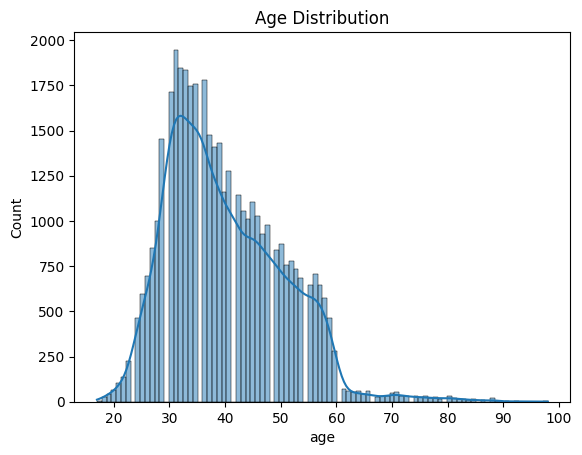

In [ ]:
#Age Distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Boxplot of Age')

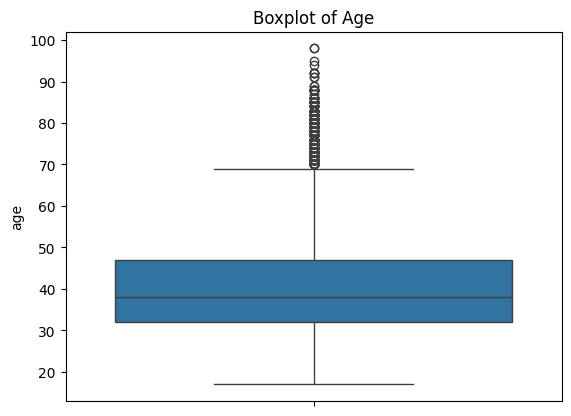

In [ ]:
#Age - consider dropping outliers
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')

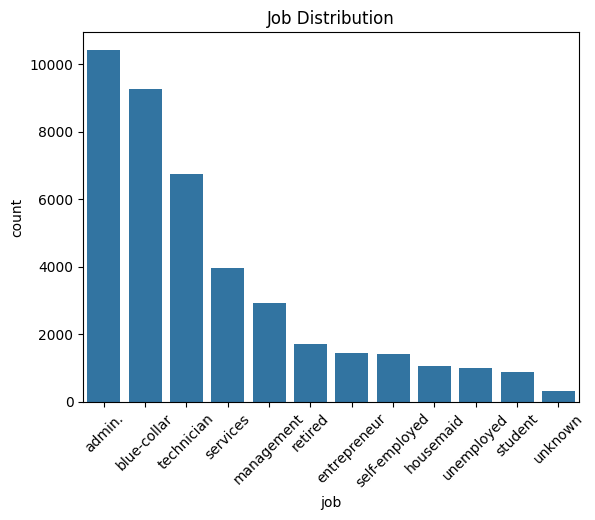

In [ ]:
#Job distribution
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

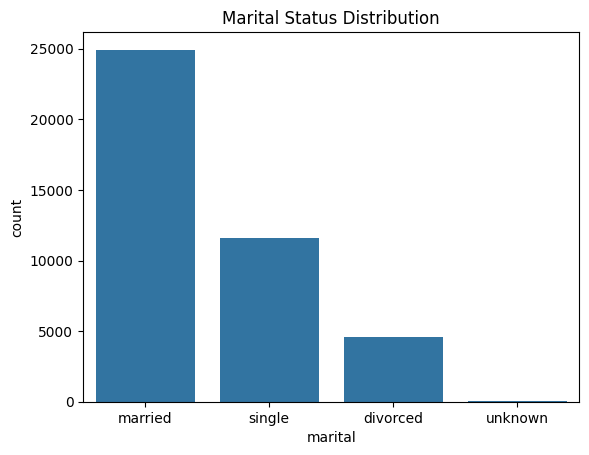

In [ ]:
#marital status dist
sns.countplot(data=df, x='marital')
plt.title('Marital Status Distribution')
plt.show()

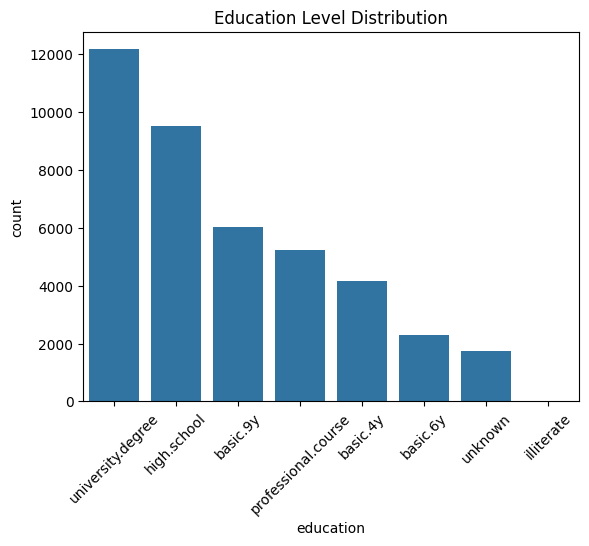

In [ ]:
#education
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

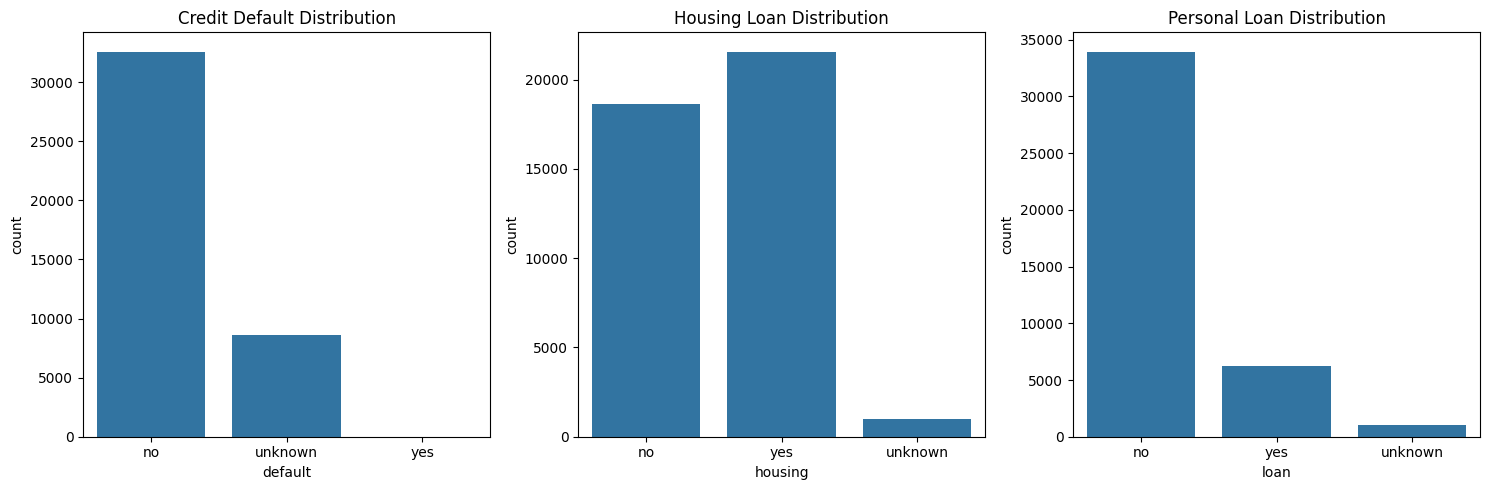

In [ ]:
#Default, Housing, Loan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(data=df, x='default', ax=ax[0])
ax[0].set_title('Credit Default Distribution')

sns.countplot(data=df, x='housing', ax=ax[1])
ax[1].set_title('Housing Loan Distribution')

sns.countplot(data=df, x='loan', ax=ax[2])
ax[2].set_title('Personal Loan Distribution')

plt.tight_layout()
plt.show()

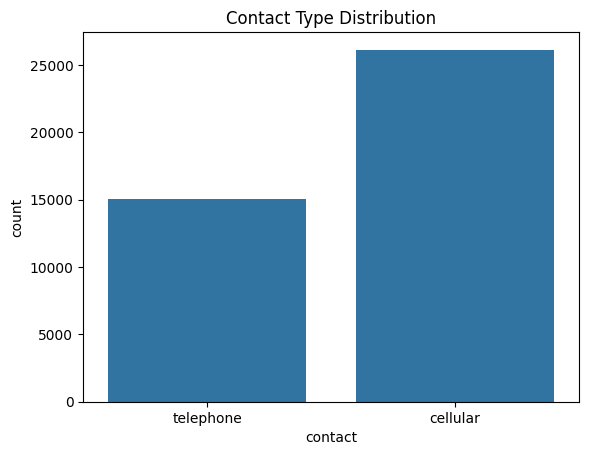

In [ ]:
#Contact
sns.countplot(data=df, x='contact')
plt.title('Contact Type Distribution')
plt.show()

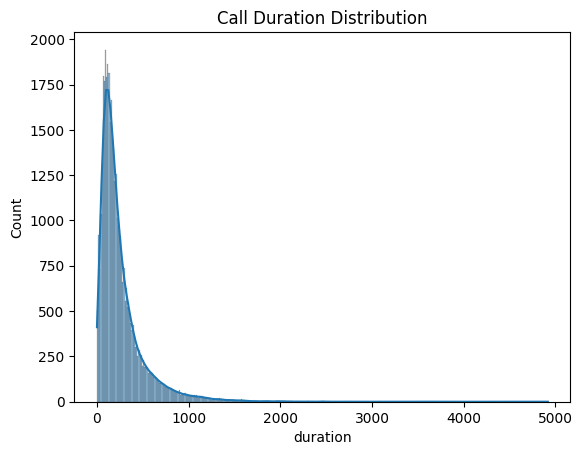

In [ ]:
#duration
sns.histplot(df['duration'], kde=True)
plt.title('Call Duration Distribution')
plt.show()

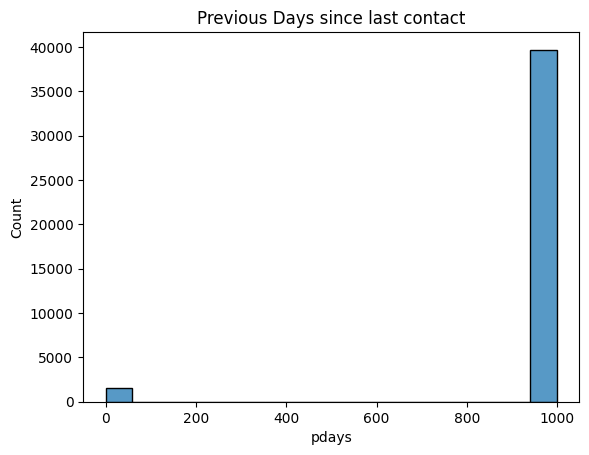

In [ ]:
#pdays
sns.histplot(df['pdays'])
plt.title('Previous Days since last contact')
plt.show()

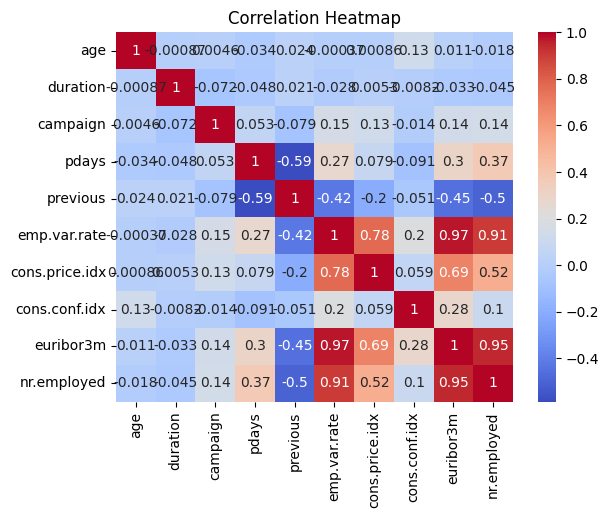

In [ ]:
# Correlation Heatmap for Numeric Variables
corr = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***NEURAL NETWORK***

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [ ]:
# List of non-numeric columns excluding 'education' and target
non_numeric_cols.remove('education')
non_numeric_cols.remove('y')

# One-Hot Encoding for all non-numeric columns except 'education'
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)  # drop_first to avoid dummy variable trap

# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,261,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
1,57,3,149,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
2,37,3,226,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
4,56,3,307,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
train_acc_scores = []
test_acc_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled), 1):
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[test_index]

# Create and compile the model
    model = create_model()

    # Train the model with early stopping
    history=model.fit(
        X_train_fold, y_train_fold,
        epochs=20,  # You can adjust the maximum number of epochs
        batch_size=32,
        verbose=1,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]  # Add the early stopping callback
    )

# Evaluate on training data
    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    train_acc_scores.append(train_acc)

# Evaluate on validation data
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    test_acc_scores.append(val_acc)

    print(f"Fold {fold} completed.")

# Calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_test_acc}')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/20
1219/1219 [==============================] - 19s 12ms/step - loss: 0.4141 - accuracy: 0.8253 - val_loss: 0.2892 - val_accuracy: 0.8887
Epoch 2/20
1219/1219 [==============================] - 6s 5ms/step - loss: 0.3078 - accuracy: 0.8839 - val_loss: 0.2655 - val_accuracy: 0.8969
Epoch 3/20
1219/1219 [==============================] - 7s 6ms/step - loss: 0.2883 - accuracy: 0.8920 - val_loss: 0.2548 - val_accuracy: 0.9028
Epoch 4/20
1219/1219 [==============================] - 5s 4ms/step - loss: 0.2745 - accuracy: 0.8958 - val_loss: 0.2473 - val_accuracy: 0.9053
Epoch 5/20
1219/1219 [==============================] - 5s 4ms/step - loss: 0.2608 - accuracy: 0.9005 - val_loss: 0.2489 - val_accuracy: 0.9079
Epoch 6/20
1219/1219 [==============================] - 11s 9ms/step - loss: 0.2559 - accuracy: 0.9039 - val_loss: 0.2462 - val_accuracy: 0.9098
Epoch 7/20
1219/1219 [==============================] - 9s 7ms/step - loss: 0.2481 - accuracy: 0.9063 - val_loss: 0.2343 - val_accura

258/258 [==============================] - 1s 2ms/step


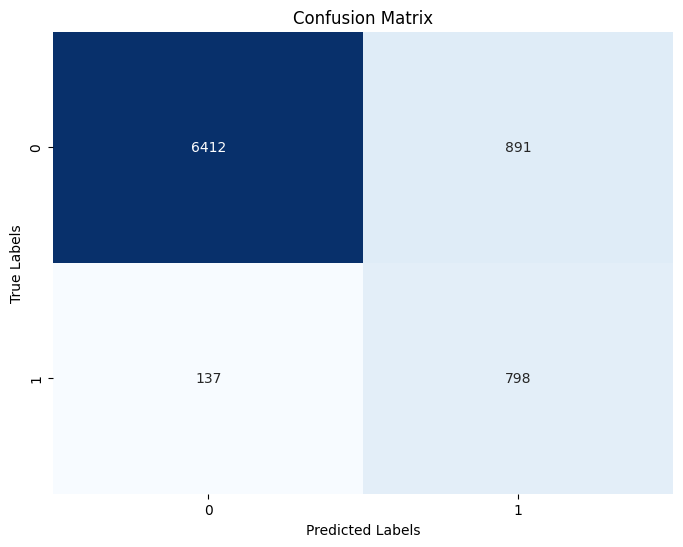

In [ ]:
# Get binary predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", np.round(accuracy,3))
print("Recall:   ", np.round(recall,3))
print("F1 Score: ", np.round(f1,3))
print("Precision:", np.round(precision,3))

Accuracy:  0.875
Recall:    0.853
F1 Score:  0.608
Precision: 0.472


Neural Network

Dummy coded the categorical variables: Job, Marital Status, Housing, Loan, Contact, Month, Day of Week, and Poutcome - drop first to avoid multicollinearity. Label Encoder for different Education levels.

Used SMOTE (Synthetic Minority Over-Sampling Technique) to deal with imbalance datasets by oversampling the minority class.

Used K-Fold Cross Validation to prevent overfitting & ensure reproducibility.

Used Early Stopping to stop training in the case that model performance does not improve after 5 epochs.

This particular model architecture consists of several hidden layers with decreasing numbers of neurons, each followed by a dropout layer to prevent overfitting.

It uses the ReLU activation function for the hidden layers and a sigmoid activation function for the output layer, suitable for binary classification tasks.

The optimizer used is Adam with a learning rate of 0.001, and the loss function is binary cross-entropy, commonly used for binary classification problems.

Results:

Accuracy: 0.861

Recall: 0.887

F1 Score: 0.592

Precision: 0.445

Analysis: Accuracy and Recall score are very good for a first pass. Precision and F1 need improvement. The poor Recall rate is likely due to the imbalance in the target variable. We can likely improve our model with Feature Engineering, Tuning Model Parameters, and other methods.

Issues: Unable to determine feature importance, black box model.

Going Forward: Deeper analysis on which features to include and exclude from the model. Evaluate performance then go from there.
